In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### `Members only`
Throughout the course so far, you've been exposed to some common problems that you may encounter with your data, from data type constraints, data range constraints, uniqueness constraints, and now membership constraints for categorical values.

In this exercise, you will map hypothetical problems to their respective categories.

- Map the data problem observed with the correct type of data problem.
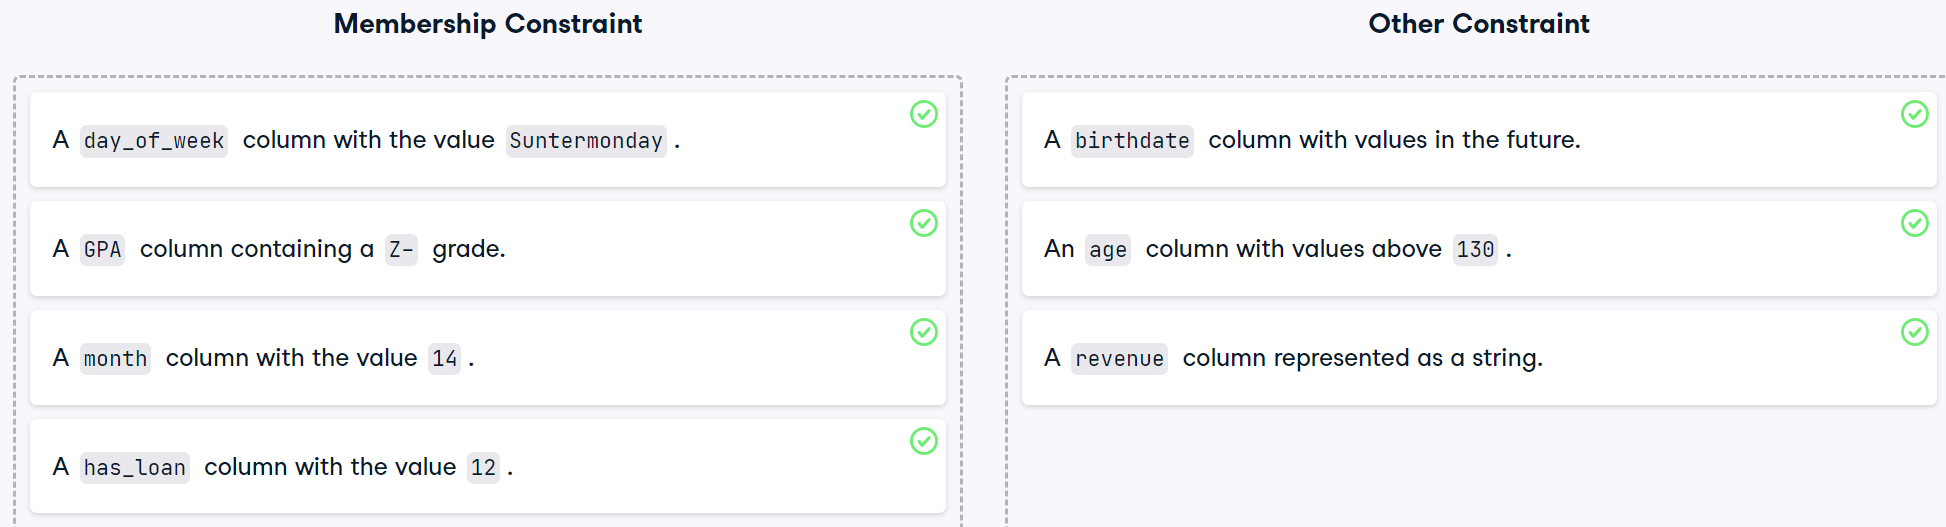



In [2]:
data = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}

categories = pd.DataFrame(data)
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [8]:
categories.dtypes

cleanliness     object
safety          object
satisfaction    object
dtype: object

In [3]:
airlines = pd.read_csv('../datasets/airlines_final.csv')
airlines = airlines.drop('Unnamed: 0', axis=1)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


#### `Finding consistency`
In this exercise and throughout this chapter, you'll be working with the __airlines__ DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named __categories__ was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the __airlines__ and __categories__ DataFrames are in your environment.

- Print the __categories__ DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in __airlines__ using the __.unique()__ method.

In [4]:
# Print categories DataFrame
print(categories)
print()
# Print unique values of survey columns in airlines
print('Cleanliness\t: ', airlines['cleanliness'].unique(), "\n")
print('Safety\t\t: ', airlines['safety'].unique(), "\n")
print('Satisfaction\t: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied

Cleanliness	:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety		:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction	:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



#### `Question`
Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?



- `cleanliness because it has an Unacceptable category`.

- cleanliness because it has a Terribly dirty category.

- satisfaction because it has a Very satisfied category.

- safety because it has a Neutral category.


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2477 non-null   int64  
 1   day            2477 non-null   object 
 2   airline        2477 non-null   object 
 3   destination    2477 non-null   object 
 4   dest_region    2477 non-null   object 
 5   dest_size      2477 non-null   object 
 6   boarding_area  2477 non-null   object 
 7   dept_time      2477 non-null   object 
 8   wait_min       2477 non-null   float64
 9   cleanliness    2477 non-null   object 
 10  safety         2477 non-null   object 
 11  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 232.3+ KB


In [6]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleanliness   5 non-null      object
 1   safety        5 non-null      object
 2   satisfaction  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


- Create a set out of the __cleanliness__ column in __airlines__ using __set()__ and find the inconsistent category by finding the difference in the __cleanliness__ column of __categories__.
- Find rows of __airlines__ with a __cleanliness__ value not in __categories__ and print the output.

In [7]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


- Print the rows with the consistent categories of __cleanliness__ only.

In [8]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2472  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2473  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2474  2684     Friday         UNITED            ORLANDO        East US   
2475  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2476  2162   Saturday  C

- __Categorical Data__: Variables that can take on one of a limited, and usually fixed, number of possible values, such as blood types or marital status. These are often encoded as numbers for use in machine learning models.
- __Identifying Inconsistencies__: Using a DataFrame of correct categories to find rows in your data that contain incorrect categorical values. For example, spotting a ___'Z+'___ blood type when only ___'A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+',___ and ___'O-'___ are valid.
- __Join Operations__: Utilizing anti joins and inner joins to filter data. An anti join helps identify rows with values not in a reference set, while an inner join filters for rows with values present in both DataFrames.
- __Python Example__:

// Finding inconsistent categories
  - inconsistent_categories = set(study_data['blood_type']) - set(categories['blood_type'])

// Identifying rows with inconsistent categories
  - inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)

// Dropping inconsistent rows
  - consistent_data = study_data[~inconsistent_rows]

#### `Inconsistent categories`
In this exercise, you'll be revisiting the __airlines__ DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, __dest_region__ and __dest_size__ respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the __airlines__ DataFrame is in your environment.

- Print the unique values in __dest_region__ and __dest_size__ respectively.

In [9]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


#### `Question`
From looking at the output, what do you think is the problem with these columns?

- The __dest_region__ column has only inconsistent values due to capitalization.

- The __dest_region__ column has inconsistent values due to capitalization and has one value that needs to be remapped.

- The __dest_size__ column has only inconsistent values due to leading and trailing spaces.

- `Both 2 and 3 are correct.`


- Change the _capitalization_ of all values of __dest_region__ to lowercase.
- Replace the '__eur__' with '__europe__' in __dest_region__ using the ___.replace()___ method.

In [10]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur': 'europe'})

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


- Strip white spaces from the __dest_size__ column using the __.strip()__ method.
- Verify that the changes have been into effect by printing the unique values of the columns using __.unique()__ 

In [11]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur': 'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


#### `Remapping categories`
To better understand survey respondents from __airlines__, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The __airlines__ DataFrame contains the __day__ and __wait_min__ columns, which are categorical and numerical respectively. The __day__ column contains the exact __day__ a flight took place, and __wait_min__ contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

__wait_type__: '__short__' for ___0-60___ min, '__medium__' for ___60-180___ and _long_ for ___180+___
__day_week__: '__weekday__' if day is in the weekday, '__weekend__' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

- Create the ranges and labels for the __wait_type__ column mentioned in the description.
- Create the __wait_type__ column by from __wait_min__ by using __pd.cut()__, while inputting __label_ranges__ and __label_names__ in the correct arguments.
- Create the __mapping__ dictionary mapping weekdays to '__weekday__' and weekend days to '__weekend__'.
- Create the __day_week__ column by using __.replace()__.

In [12]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins=label_ranges,
                               labels=label_names)

# Create mappings and replace
mappings = {'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday',
            'Thursday': 'weekday', 'Friday': 'weekday',
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified,long,weekday
2473,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium,weekday
2474,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,medium,weekday
2475,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,medium,weekday


`ou just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an __assert__ statement to check your changes passed.`

In [13]:
airlines = airlines.iloc[:200]
airlines

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,819,Sunday,ALASKA,PORTLAND,west us,Medium,Gates 50-59,2018-12-31,80.0,Somewhat clean,Neutral,Neutral,medium,weekend
196,2924,Friday,TURKISH AIRLINES,ISTANBUL,middle east,Hub,Gates 91-102,2018-12-31,205.0,Somewhat clean,Somewhat safe,Somewhat satsified,long,weekday
197,2245,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,140.0,Average,Somewhat safe,Somewhat satsified,medium,weekday
198,238,Wednesday,AMERICAN,LOS ANGELES,west us,Hub,Gates 50-59,2018-12-31,115.0,Somewhat clean,Very safe,Somewhat satsified,medium,weekday


- __Value Inconsistency__: You discovered how capitalization and whitespace inconsistencies in category labels can mislead data analysis. For instance, treating 'Married' and 'married' as separate categories due to capitalization differences. To fix this, you can use __str.upper()__ or __str.lower()__ for capitalization consistency and __str.strip()__ to remove leading or trailing spaces.
- __Creating Categories__: You explored creating new categories from existing data using the __pd.cut()__ and __pd.qcut()__ functions from pandas. __pd.cut()__ allows specifying exact category ranges, while __pd.qcut()__ divides data based on its distribution into a specified number of categories.
- __Remapping Categories__: You learned to collapse multiple categories into fewer ones for simplification, using the __replace()__ method with a mapping dictionary. This is useful for reducing complexity in your data.

For example, to create and remap categories in the airlines DataFrame, you used:

`Create ranges for categories`

label_ranges = [0, 60, 180, np.inf]

label_names = ['short', 'medium', 'long']

`Create wait_type column`

airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

`Create mappings and replace`

mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

This code snippet demonstrates how to categorize wait times into 'short', 'medium', and 'long' based on the number of minutes, and how to map days to 'weekday' or 'weekend' categories, showcasing practical applications of the concepts you learned.

In [14]:
full_name = np.load('./datas/full_name.npy')
full_name = full_name.tolist() 

In [15]:
airlines['full_name'] = full_name

C:\Users\Albert\AppData\Local\Temp\ipykernel_4204\643547023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['full_name'] = full_name


In [16]:
airlines.to_csv('airlines_ch2.csv', index=False)

#### `Removing titles and taking names`
While collecting survey respondent metadata in the __airlines__ DataFrame, the full name of respondents was saved in the __full_name__ column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "__Dr.__", "__Mr.__", "__Ms.__" and "__ __".

Your ultimate objective is to create two new columns named __first_name__ and __last_name__, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The __airlines__ DataFrame is in your environment, alongside pandas as pd.

- Remove ___"Dr.", "Mr.", "Miss"___ and __"Ms."__ from __full_name__ by replacing them with an empty string ___""___ in that order.
- Run the __assert__ statement using __.str.contains()__ that tests whether full_name still contains any of the honorifics.

In [17]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.", "")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.", "")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss", "")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.", "")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

C:\Users\Albert\AppData\Local\Temp\ipykernel_4204\1906649235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['full_name'] = airlines['full_name'].str.replace("Dr.", "")
C:\Users\Albert\AppData\Local\Temp\ipykernel_4204\1906649235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['full_name'] = airlines['full_name'].str.replace("Mr.", "")
C:\Users\Albert\AppData\Local\Temp\ipykernel_4204\1906649235.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [43]:
airlines_ = pd.read_csv('./datas/airlines_ch2.csv')
airlines_ = airlines_[airlines_['full_name'].str.startswith('Dr.')]
airlines_.shape[0]
print(airlines_['full_name'])
# airlines_.value_counts()

3      Dr. Christine Nicholson
10            Dr. Laith Decker
29        Dr. Charlotte Savage
61             Dr. Daniel Hood
69            Dr. Malik Hanson
71            Dr. Jared Holman
73            Dr. Jane Harrell
78             Dr. Damian Wynn
86               Dr. Ella Pena
93           Dr. Xavier Medina
137        Dr. Emerson Woodard
138           Dr. Astra Mcneil
139          Dr. Shafira Marks
153          Dr. Fulton Turner
154          Dr. Maggie Cortez
156            Dr. Lynn Thomas
171           Dr. Rose Fleming
182           Dr. Zahir Hardin
Name: full_name, dtype: object


In [19]:
airlines_ch2 = pd.read_csv('airlines_ch2.csv')
airlines['full_name'] = airlines['full_name'].str.replace(r'DR\.|Mr\.|Miss|Ms\.', '', regex=True)

airlines['full_name']

C:\Users\Albert\AppData\Local\Temp\ipykernel_4204\3351980742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['full_name'] = airlines['full_name'].str.replace(r'DR\.|Mr\.|Miss|Ms\.', '', regex=True)


0            Melodie Stuart
1           Dominic Shannon
2         Quintessa Tillman
3       Christine Nicholson
4           Regina Clements
               ...         
195            Vanna Rivera
196              Venus Lowe
197         Amethyst Nieves
198          Vivian Foreman
199           Wendy Griffin
Name: full_name, Length: 200, dtype: object

 By normalizing full names this way, you can now easily split them into first names and last names!

In [36]:
airlines = airlines.loc[:28, 'id':'satisfaction']
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29 non-null     int64  
 1   day            29 non-null     object 
 2   airline        29 non-null     object 
 3   destination    29 non-null     object 
 4   dest_region    29 non-null     object 
 5   dest_size      29 non-null     object 
 6   boarding_area  29 non-null     object 
 7   dept_time      29 non-null     object 
 8   wait_min       29 non-null     float64
 9   cleanliness    29 non-null     object 
 10  safety         29 non-null     object 
 11  satisfaction   29 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.8+ KB


In [37]:
survey_response = np.load('./datas/survey_response.npy')
survey_response = survey_response.tolist()

In [40]:
airlines['survey_response'] = survey_response
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               29 non-null     int64  
 1   day              29 non-null     object 
 2   airline          29 non-null     object 
 3   destination      29 non-null     object 
 4   dest_region      29 non-null     object 
 5   dest_size        29 non-null     object 
 6   boarding_area    29 non-null     object 
 7   dept_time        29 non-null     object 
 8   wait_min         29 non-null     float64
 9   cleanliness      29 non-null     object 
 10  safety           29 non-null     object 
 11  satisfaction     29 non-null     object 
 12  survey_response  29 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 3.1+ KB


#### `Keeping it descriptive`
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the __survey_response__ column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than ___40___ , and make sure your new DataFrame contains responses with ___40___ characters or more using an assert statement.

The __airlines__ DataFrame is in your environment, and pandas is imported as pd.

- Using the __airlines__ DataFrame, store the length of each instance in the __survey_response__ column in __resp_length__ by using __.str.len()__.
- Isolate the rows of __airlines__ with __resp_length__ higher than ___40___.
- Assert that the smallest __survey_response__ length in __airlines_survey__ is now bigger than ___40___.

In [42]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
pd.set_option('display.max_colwidth', None)
print(airlines_survey['survey_response'])

17                 The airport personnell forgot to alert us of delayed flights, the bathrooms could have been cleaner
18                                 The food in the airport was really really expensive - also no automatic escalators!
19    One of the other travelers was really loud and talkative and was making a scene and no one did anything about it
20                                   I don't remember answering the survey with these scores, my experience was great!
21                                                      The airport personnel kept ignoring my requests for directions
22                                 The chair I sat in was extremely uncomfortable, I still have back pain to this day!
23                                     I wish you were more like other airports, the flights were really disorganized!
24                                I was really unsatisfied with the wait times before the flight. It was unacceptable.
25                         The flight was okay, 

These types of feedbacks are essential to improving any service. Coupled with some wordcount analysis, you can find common patterns across all survey responses in no time!